# Trabalho 2 de Inteligência Artificial


* Ana Vitória Gouvea de Oliveira Freitas

* Eduardo Vinícius Barbosa Rossi

* Matheus Luis Oliveira da Silva

* Pedro Augusto Ribeiro Gomes

* Sofhia de Souza Gonçalves

* Thiago Henrique dos Santos Cardoso  



# **Reserva de hoteis**
Predizer se um cliente vai ou não cancelar a reserva em um hotel.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1. Entendendo os dados

1. Booking_ID: unique identifier of each booking

2. no_of_adults: Number of adults

3. no_of_children: Number of Children

4. no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

5. no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

6. type_of_meal_plan: Type of meal plan booked by the customer:

7. required_car_parking_space: Does the customer require a car
parking space? (0 - No, 1- Yes)

8. room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.

9. lead_time: Number of days between the date of booking and the arrival date

10. arrival_year: Year of arrival date

11. arrival_month: Month of arrival date

12. arrival_date: Date of the month

13. market_segment_type: Market segment designation.

14. repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)

15. no_of_previous_cancellations: Number of previous bookings that
were canceled by the customer prior to the current booking

15. no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking

16. avg_price_per_room: Average price per day of the reservation;
prices of the rooms are dynamic. (in euros)

17. no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)

18. booking_status: Flag indicating if the booking was canceled or not.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_raw = pd.read_csv("/content/drive/MyDrive/USP/Datasets/IA/trab2/Hotel Reservations.csv")
# df_raw = pd.read_csv("Hotel Reservations.csv")


In [4]:
df_raw

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


## 2. Pré-processamento de dados

### Identificando valores nulos

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

O dataset já apresenta dados limpos, Não há valores nulos.

In [6]:
# Fazendo uma cópia do dataset original, o que pode ser útil para consultas mais tarde
df = df_raw.copy()

### Verificando duplicatas

In [7]:
df.duplicated().sum()

0

O dataset também não possui duplicatas. Assim podemos passar para a fase de transformação e manipulação dos dados

### Features categóricas

Vamos nos aprofundar nas features que são do tipo objeto para entendermos do que se tratam esses dados.

In [8]:
df['type_of_meal_plan'].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

In [9]:
df['room_type_reserved'].unique()

array(['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'], dtype=object)

In [10]:
df['market_segment_type'].unique()

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

In [11]:
# O target (variável que queremos prever)
df['booking_status'] = df['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})
df['booking_status']

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status, Length: 36275, dtype: int64

## 3. Análise Exploratória de dados

## 3.1 Investigando as variáveis categóricas

#### Histogramas (de features cateǵoricas)

In [12]:
df['room_type_reserved'] = df['room_type_reserved'].map({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7})

Text(0.5, 1.0, 'room_type_reserved')

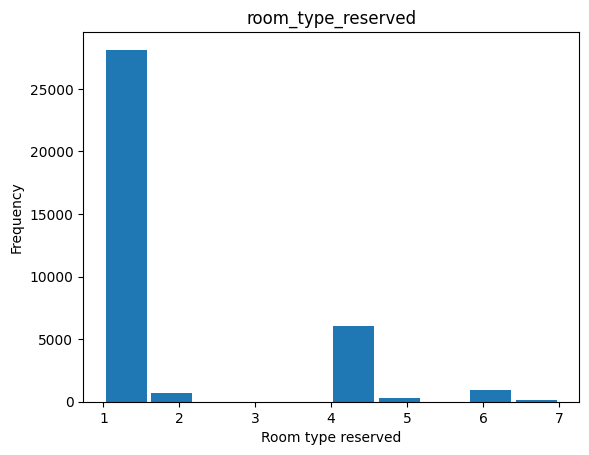

In [13]:
room_type_reserved = df['room_type_reserved']
plt.hist(room_type_reserved, rwidth=0.9)
plt.xlabel('Room type reserved')
plt.ylabel('Frequency')
plt.title('room_type_reserved')

Text(0.5, 1.0, 'Type of Meal histogram')

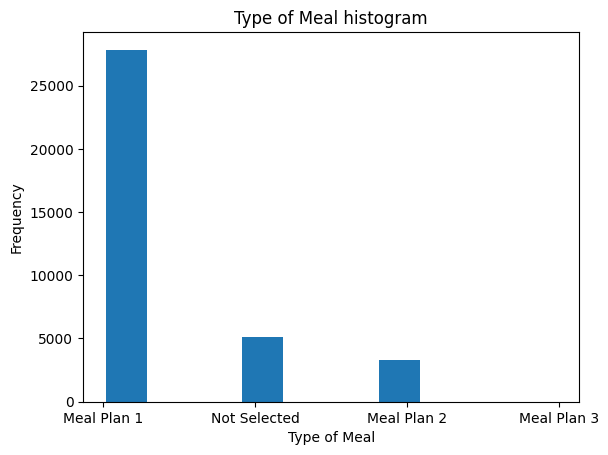

In [14]:
type_of_meal = df['type_of_meal_plan']
plt.hist(type_of_meal, rwidth=0.9)
plt.xlabel('Type of Meal')
plt.ylabel('Frequency')
plt.title('Type of Meal histogram')

A maior parte dos planos de refeição são Meal Plan 1. Temos mais tipos de refeição Not Selected do que Meal Plan 2, e nenhuma Meal Plan 3.

Text(0.5, 1.0, 'Market Segment Type')

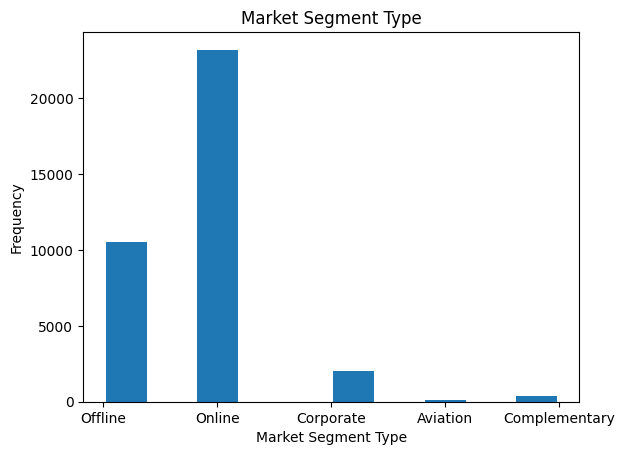

In [15]:
market_segment_type = df['market_segment_type']
plt.hist(market_segment_type, rwidth=0.9)
plt.xlabel('Market Segment Type')
plt.ylabel('Frequency')
plt.title('Market Segment Type')

A maioria das reservas é realizada por meio de canais online, seguida pelas efetuadas através de métodos offline. Uma parcela menor das reservas origina-se de empresas, para fins de viagens corporativas, e de tripulações aéreas. Além disso, existe um segmento de reservas complementares, que inclui ofertas promocionais exclusivas e acomodações para convidados VIP, mas que não tem um número muito relevante também.

Verificando o balanceamento das classes:

Text(0.5, 1.0, 'Booking Status')

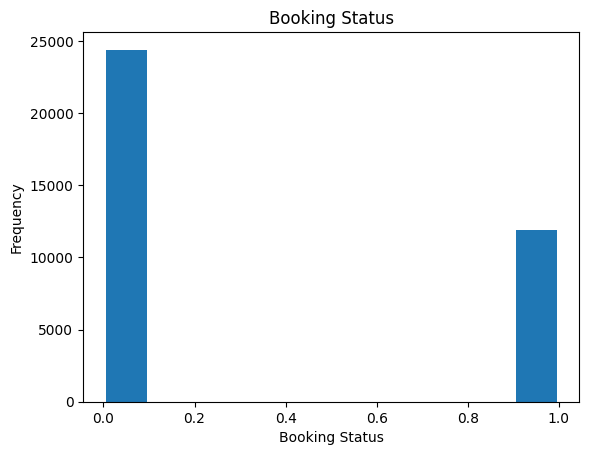

In [16]:
booking_status = df['booking_status']
plt.hist(booking_status, rwidth=0.9)
plt.xlabel('Booking Status')
plt.ylabel('Frequency')
plt.title('Booking Status')

### Sobre datas

#### Dia

Text(0.5, 1.0, 'Arrival per Day')

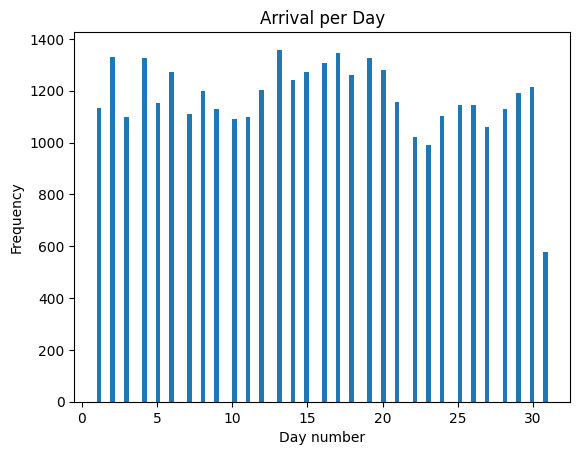

In [17]:
plt.hist(df['arrival_date'], bins= 100)
plt.xlabel('Day number')
plt.ylabel('Frequency')
plt.title('Arrival per Day')

Não existe nenhuma disparidade muito grande entre os dias de chegada dos hóspedes. Porém, podemos perceber que existe uma redução em certos períodos do mês (por volta do dia 10 e do dia 22), então pode ser uma feature interessante de manter.

#### Mês

Text(0.5, 1.0, 'Arrival per Month')

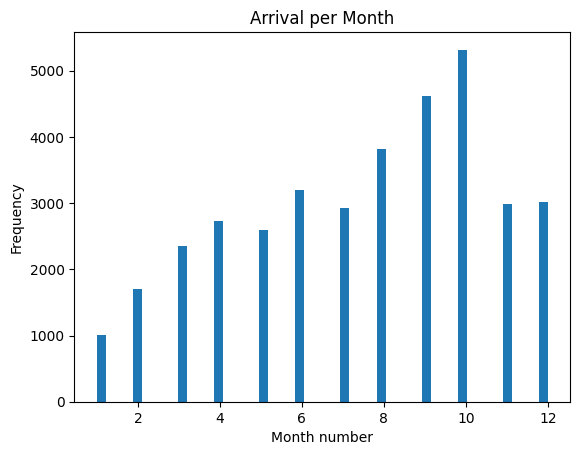

In [18]:
plt.hist(df['arrival_month'], bins = 50)
plt.xlabel('Month number')
plt.ylabel('Frequency')
plt.title('Arrival per Month')

Observamos um aumento progressivo nas chegadas ao longo do ano, com um declínio a partir de novembro. Embora não haja informações específicas sobre o país de origem desses dados, é plausível supor que sejam de uma região onde as férias de verão ocorrem no meio do ano, período que normalmente coincide com um aumento na tendência de viagens.

#### Ano

Text(0.5, 1.0, 'Arrival per Year')

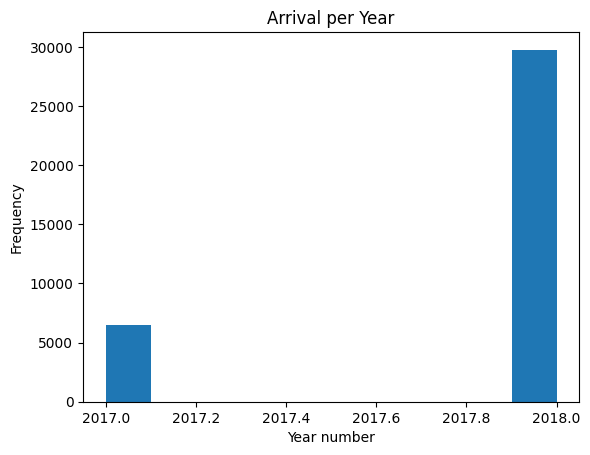

In [19]:
plt.hist(df['arrival_year'])
plt.xlabel('Year number')
plt.ylabel('Frequency')
plt.title('Arrival per Year')

A maioria dos nossos dados está concentrada no ano de 2018. Devido a essa desproporção e à ausência de dados de vários anos, descartamos essa feature da nossa análise.

### 3.2 Correlações entre variáveis

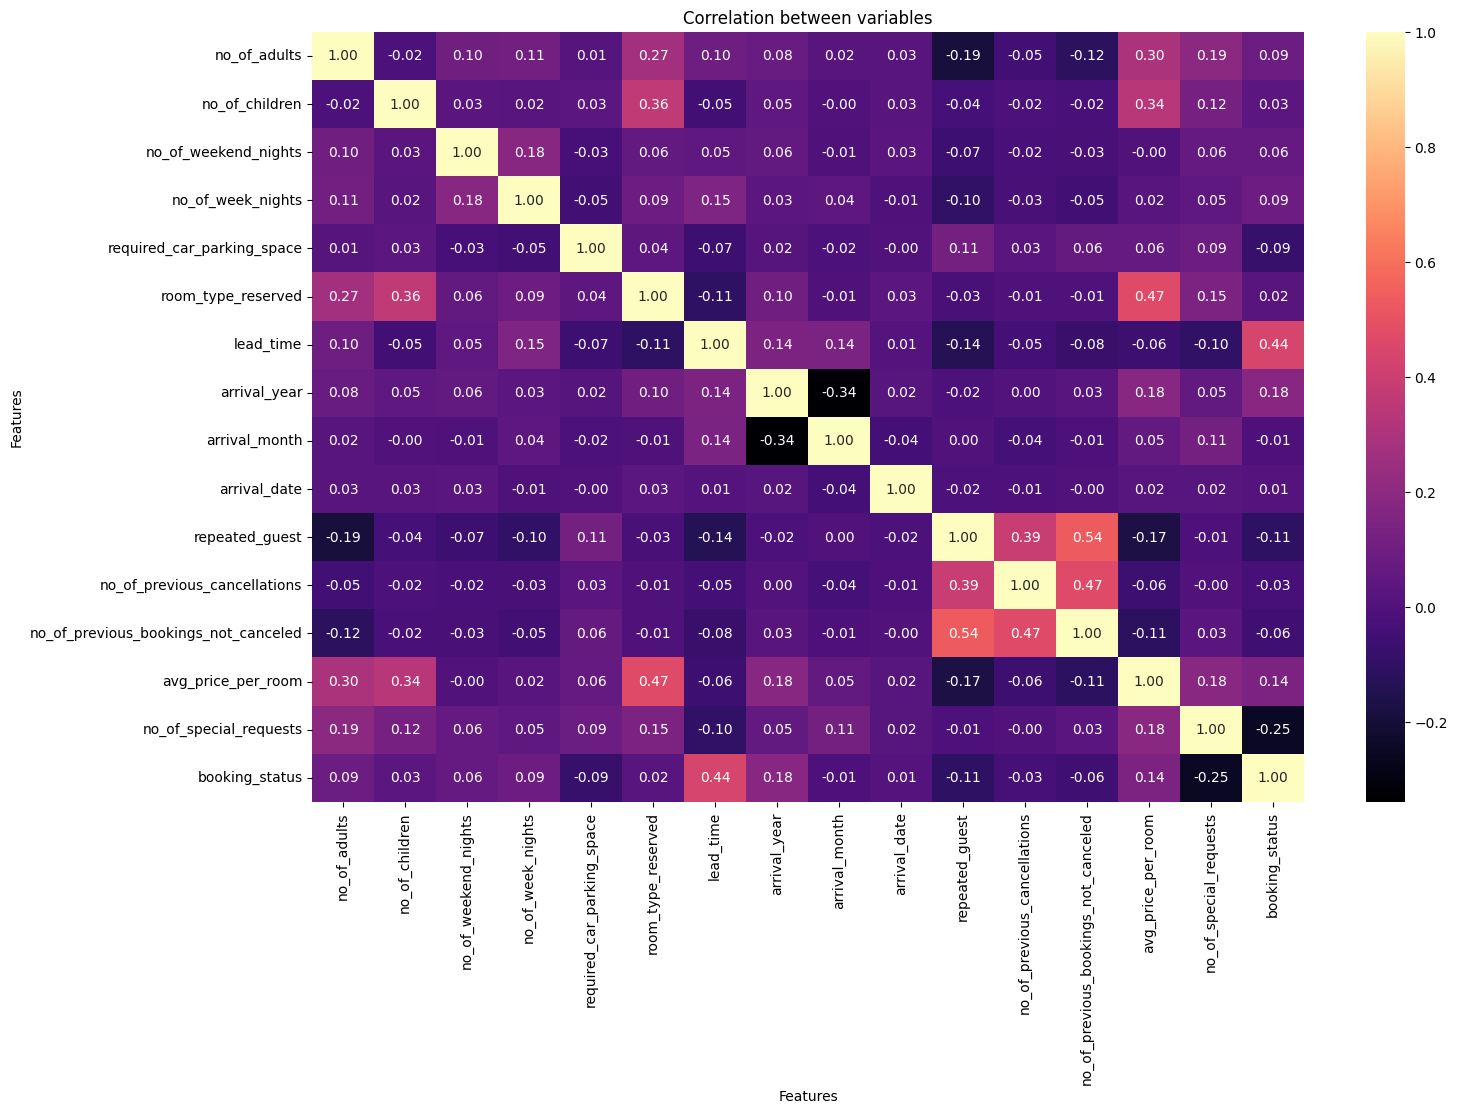

In [20]:
fig, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'magma',fmt='.2f')
plt.gca().set_title('Correlation between variables')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()


Obtivemos um resutlado interessante com a relação entre as features 'number_of_previous_bookings_not_canceled' e 'repeated_guest'



In [21]:
df['no_of_previous_cancellations'].unique()

array([ 0,  3,  1,  2, 11,  4,  5, 13,  6])

In [22]:
df['no_of_previous_bookings_not_canceled'].unique()

array([ 0,  5,  1,  3,  4, 12, 19,  2, 15, 17,  7, 20, 16, 50, 13,  6, 14,
       34, 18,  8, 10, 23, 11, 49, 47, 53,  9, 33, 22, 24, 52, 21, 48, 28,
       39, 25, 31, 38, 26, 51, 42, 37, 35, 56, 44, 27, 32, 55, 45, 30, 57,
       46, 54, 43, 58, 41, 29, 40, 36])

In [23]:
df_normalized = df.drop(['Booking_ID', 'type_of_meal_plan','room_type_reserved',  'market_segment_type', 'booking_status' ], axis=1)
df_normalized = (df_normalized - df_normalized.min()) / (df_normalized.max() - df_normalized.min())

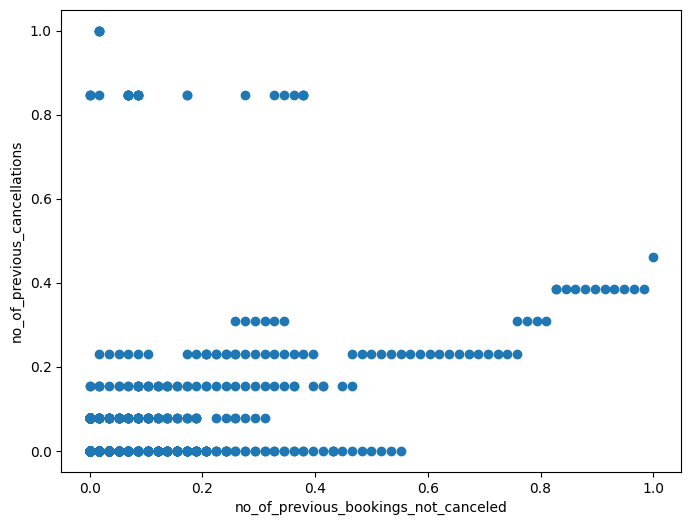

In [24]:
plt.figure(figsize=(8,6))
plt.xlabel('no_of_previous_bookings_not_canceled')
plt.ylabel('no_of_previous_cancellations')
plt.scatter(df_normalized['no_of_previous_bookings_not_canceled'],df_normalized['no_of_previous_cancellations'],)

### 3.3  Distribuição das Variáveis Contínuas

Vamos fazer uma análise exploratória para fornecer uma visão geral das características das variáveis contínuas.

A partir dos histogramas que vamos gerar poderemos observar que:
1. **Número de Adultos (`no_of_adults`):**
   - O histograma revela a distribuição do número de adultos nas reservas.
   - Permite identificar se a maioria das reservas é para casais, grupos ou viajantes individuais.

2. **Número de Crianças (`no_of_children`):**
   - Examina a distribuição da presença de crianças nas reservas.
   - Ajuda a observar a frequência de reservas com ou sem crianças.

3. **Número de Noites de Fim de Semana (`no_of_weekend_nights`):**
   - Mostra como as reservas estão distribuídas em relação às noites de fim de semana.
   - Pode indicar preferências por estadias durante a semana ou nos fins de semana.

4. **Número de Noites de Semana (`no_of_week_nights`):**
   - Analisa a distribuição das reservas em relação às noites de semana.
   - Pode revelar se a maioria das reservas é para viagens de negócios ou lazer durante a semana.

5. **Tempo de Antecedência da Reserva (`lead_time`):**
   - Exibe a distribuição do tempo entre a data da reserva e a data de chegada.
   - Ajuda a entender padrões de reservas de última hora ou planejadas com antecedência.

6. **Preço Médio por Quarto (`avg_price_per_room`):**
   - Mostra como os preços dos quartos estão distribuídos.
   - Pode fornecer insights sobre a faixa de preço preferida pelos clientes.

7. **Número de Pedidos Especiais (`no_of_special_requests`):**
   - Examina a frequência de pedidos especiais feitos pelos clientes.
   - Pode indicar o nível de personalização ou exigências específicas dos hóspedes.

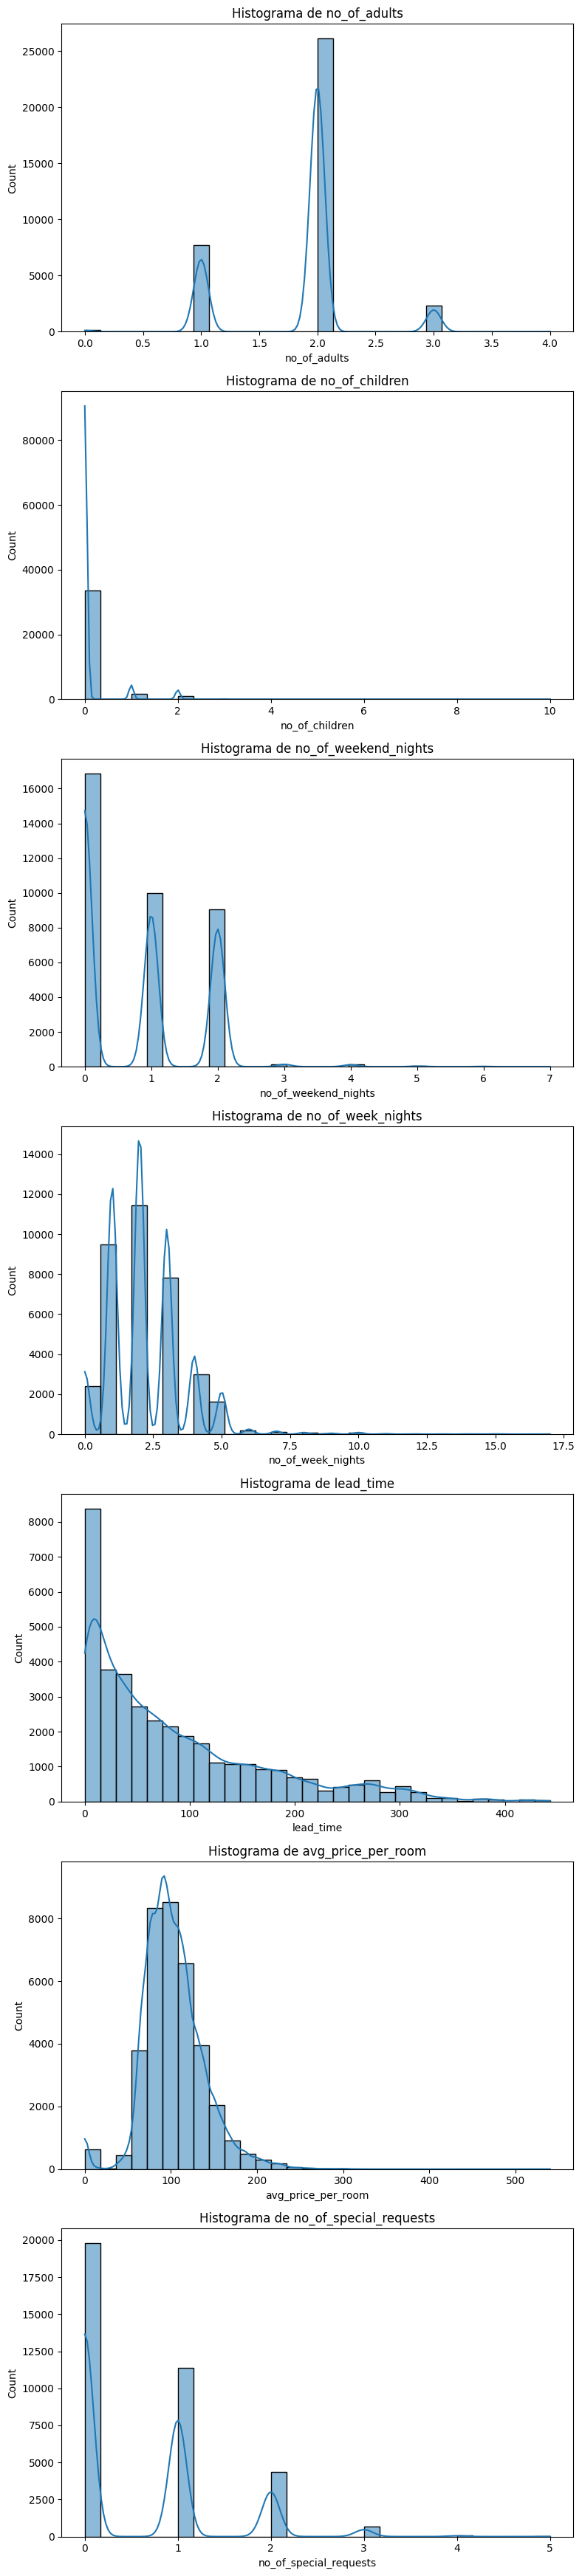

In [25]:
# Selecionar variáveis contínuas
variaveis_continuas = [
    'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
    'lead_time', 'avg_price_per_room', 'no_of_special_requests'
]

# Definir o número de subplots e o tamanho da figura
num_subplots = len(variaveis_continuas)
fig, axes = plt.subplots(nrows=num_subplots, ncols=1, figsize=(8, 5 * num_subplots))

# Criar histogramas
for i, variavel in enumerate(variaveis_continuas):
    sns.histplot(df[variavel], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Histograma de {variavel}')

# Ajustar o layout
plt.tight_layout()
plt.show()

Podemos concluir que

*   A maior parte das reservas é feita por casais

*   A maior parte das reservas não inclui crianças - o que faz sentido, dado a conclusão anterior

*   A maioria das reservas não inclui dois dias de fim de semana - o que faz sentido, dado que normalmente as pessoas que vão precisam estar de volta no início da semana seguinte, então voltam no domingo (ou antes).
*   A média de noites por semana é 2.5

*   A maior parte das reservas são feitas com bastante antecedência.

*   A média de preço dos quartos selecionados é de 100 euros.

*   A maior parte das reservas não inclui solicitações especiais


### 3.4  Detectando possível outliers

In [26]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,1.708890,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655,0.327636
std,0.518715,0.402648,0.870644,1.410905,0.173281,1.399851,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,1.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,1.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,1.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,7.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


<Axes: ylabel='lead_time'>

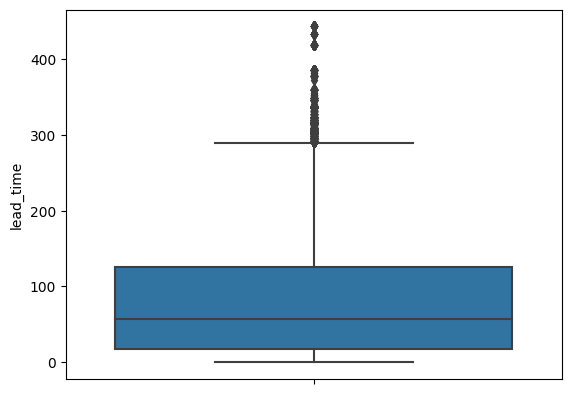

In [27]:
sns.boxplot(y=df['lead_time'])

<Axes: ylabel='no_of_special_requests'>

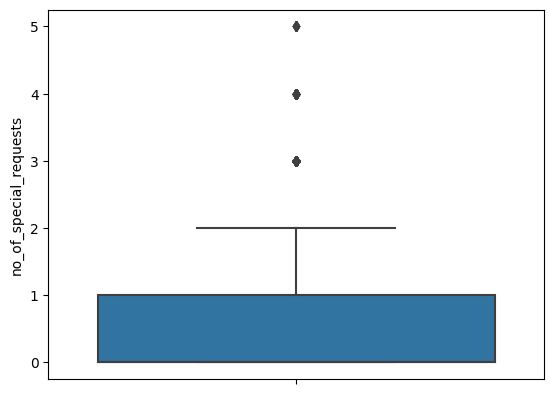

In [28]:
sns.boxplot(y=df['no_of_special_requests'])

Ambas as variáveis analisadas apresentam outliers. Tais dados podem acabar por possuírem valor informativo, então seria imprudentes removê-los de imediato. Iremos mantê-los e usá-los com modelos robustos, enquanto que, para modelos sensíveis, realizaremos uma padronização.

Encoding: partindo da hipótese de que a variável room_type possui alguma noção de ordem embutida, iremos codificá-la usando label encoding - independentemente do modelo.

In [29]:
# Já foi feito anteriormente para plot
# df['room_type_reserved'] = df['room_type_reserved'].map({'Room_Type 1': 1, 'Room_Type 2': 2, 'Room_Type 3': 3, 'Room_Type 4': 4, 'Room_Type 5': 5, 'Room_Type 6': 6, 'Room_Type 7': 7})

array([[1.        , 0.46989927],
       [0.46989927, 1.        ]])

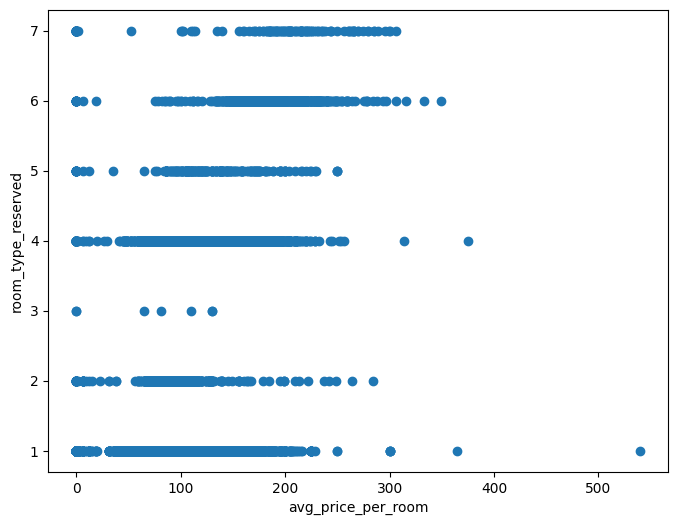

In [30]:
plt.figure(figsize=(8,6))
plt.xlabel('avg_price_per_room')
plt.ylabel('room_type_reserved')
plt.scatter(df['avg_price_per_room'],df['room_type_reserved'])
np.corrcoef(df['avg_price_per_room'],df['room_type_reserved'])

## 4. Modelagem

Cada modelo possui suas próprias características, e portanto deve ter seus dados tratados de maneiras diferentes.

#### Features para dropar
1. Arrival_year: O mês de chegada e  o dia de chegada podem ser interessantes, mas o ano provavelmente não

2. Booking_ID: É apenas um índice

In [31]:
# Pré-processamento que servirá para todos os modelos
df = df.drop(['Booking_ID','arrival_year'], axis=1)

### 4.3 Random Forest

#### 4.3.1 Random forest: feature engineering

In [32]:
df_rf = df.copy()

Random Forest é um modelo que lida bem com label encoding, pois não é baseado em distâncias ou funções de perda, mas sim na proporção de amostras das features.

In [33]:
df_rf['type_of_meal_plan'] = df['type_of_meal_plan'].map({'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3})

In [34]:
df_rf['market_segment_type'] = df['market_segment_type'].map({'Offline': 0,'Online': 1,'Corporate': 2,'Aviation': 3,'Complementary': 4,})

#### 4.3.2 Random Forest: Separando os dados em treino e teste

In [35]:
X = df_rf.drop(['booking_status'],axis=1)
y= df_rf['booking_status']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [38]:
X_train

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
5422,2,1,0,1,1,0,1,75,10,20,1,0,0,0,135.00,0
10017,2,0,0,4,1,0,5,120,4,5,1,0,0,0,94.86,0
11682,2,0,4,8,1,0,1,186,8,7,1,0,0,0,108.45,0
20911,2,0,2,7,0,0,1,7,11,15,1,0,0,0,79.14,0
25586,2,0,1,2,1,0,4,15,9,26,1,1,0,1,164.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,2,0,2,2,1,0,1,43,12,26,0,0,0,0,55.00,2
6265,1,0,0,2,2,0,1,102,10,16,1,0,0,0,80.00,0
11284,2,0,0,2,1,0,1,5,5,24,2,0,0,0,110.00,1
860,2,0,0,3,1,0,1,213,6,7,1,0,0,0,130.00,0


#### 4.3.3 Random Forest: Treinamento do modelo


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

#### 4.3.4 Random Forest: Previsão do modelo

In [41]:
rf_predictions = rf.predict(X_test)

#### 4.3.5 Random Forest: Avaliando o modelo

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [43]:
acc_rf = accuracy_score(y_test,rf_predictions)
f1_rf = f1_score(y_test,rf_predictions)
prec_rf = precision_score(y_test,rf_predictions)
rec_rf = recall_score(y_test,rf_predictions)
results_rf = pd.DataFrame([['Random forest', acc_rf, f1_rf, prec_rf, rec_rf]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_rf

,Model,Accuracy Score,F1 score,Precision,Recall
0,Random forest,0.904179,0.849263,0.893757,0.808989


#### 4.3.6 Random Forest: Interpretabilidade. Enxergando a importância de cada feature

In [44]:
rf.feature_importances_

array([0.02692419, 0.00743509, 0.03826748, 0.05296212, 0.02176192,
       0.00653756, 0.01599885, 0.33016194, 0.0788952 , 0.09352873,
       0.05323677, 0.00255481, 0.00034348, 0.00129766, 0.17399394,
       0.09610026])

In [45]:
feature_names = df_rf.drop(['booking_status'], axis=1).columns

In [46]:
feature_names

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_month', 'arrival_date',
       'market_segment_type', 'repeated_guest', 'no_of_previous_cancellations',
       'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
       'no_of_special_requests'],
      dtype='object')

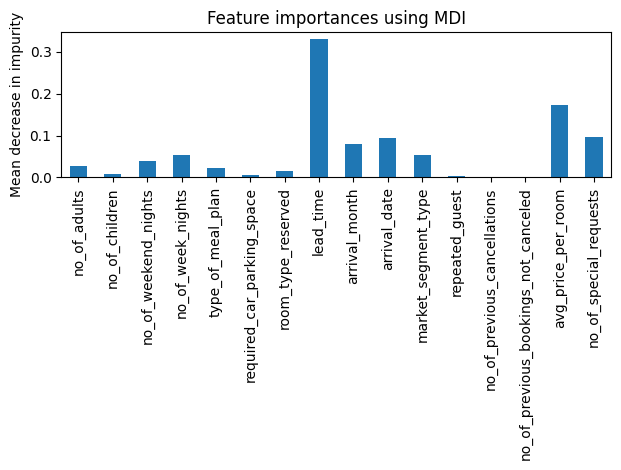

In [47]:
forest_importances = pd.Series(rf.feature_importances_, index=feature_names )

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

#### 4.3.7 Random Forest: Grid Search

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Número de árvores na floresta
    'max_depth': [10, 20, 30, None],  # Máximo número de níveis na árvore
    'min_samples_split': [2, 5, 10],  # Míniomo número de amostras requerido para dividir um nó
    'bootstrap': [True, False]  # Método para selecionar amostras para treinamento em cada árvore
}

In [50]:
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_


In [51]:
best_params

{'bootstrap': True,
 'max_depth': 30,
 'min_samples_split': 2,
 'n_estimators': 200}

In [52]:
best_rf.fit(X_train, y_train)
preds = best_rf.predict(X_test)
acc_best_rf = accuracy_score(y_test,preds)
f1_best_rf = f1_score(y_test,preds)
prec_best_rf = precision_score(y_test,preds)
rec_best_rf = recall_score(y_test,preds)
results_best_rf = pd.DataFrame([['Random forest', acc_best_rf, f1_best_rf, prec_best_rf, rec_best_rf]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_best_rf

,Model,Accuracy Score,F1 score,Precision,Recall
0,Random forest,0.903738,0.848936,0.891028,0.810641


### 4.4 KNN

#### 4.4.1 KNN: Feature Engineering

In [53]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,1,224,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,1,5,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,1,1,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,1,211,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,1,48,4,11,Online,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,4,85,8,3,Online,0,0,0,167.80,1,0
36271,2,0,1,3,Meal Plan 1,0,1,228,10,17,Online,0,0,0,90.95,2,1
36272,2,0,2,6,Meal Plan 1,0,1,148,7,1,Online,0,0,0,98.39,2,0
36273,2,0,0,3,Not Selected,0,1,63,4,21,Online,0,0,0,94.50,0,1


In [54]:
df_knn = df.copy()

Diferentemente do Random Forest, o KNN é um modelo que assume uma distância entre as amostras, portanto o label encoding não é uma boa opção em features que não são ordinais.

Sendo assim, vamos utilizar o one_hot_encoding nas features categóricas.

In [55]:
# One hot encoding
one_hot_market_segment_type = pd.get_dummies(df_knn['market_segment_type'], prefix='Market')
one_hot_meal_plan = pd.get_dummies(df_knn['type_of_meal_plan'], prefix='MealPlan')
df_knn = pd.concat([df_knn.drop(['market_segment_type', 'type_of_meal_plan'], axis=1),one_hot_market_segment_type, one_hot_meal_plan ], axis=1)

In [56]:
df_knn.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'room_type_reserved',
       'lead_time', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status',
       'Market_Aviation', 'Market_Complementary', 'Market_Corporate',
       'Market_Offline', 'Market_Online', 'MealPlan_Meal Plan 1',
       'MealPlan_Meal Plan 2', 'MealPlan_Meal Plan 3',
       'MealPlan_Not Selected'],
      dtype='object')

#### 4.4.2 KNN: Normalizando e separando dados de treino e teste

In [57]:
X = df_knn.drop(['booking_status'], axis=1)
y = df_knn['booking_status']

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(X)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### 4.4.3 KNN: Treinamento do Modelo

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

#### 4.4.4 KNN: Previsão do modelo

In [63]:
knn_predictions = knn.predict(X_test)

#### 4.4.5 KNN: Avaliação do modelo

In [64]:
acc_knn = accuracy_score(y_test,knn_predictions)
f1_knn = f1_score(y_test,knn_predictions)
prec_knn = precision_score(y_test,knn_predictions)
rec_knn = recall_score(y_test,knn_predictions)
results_knn = pd.DataFrame([['Knn', acc_knn, f1_knn, prec_knn, rec_knn]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_knn

,Model,Accuracy Score,F1 score,Precision,Recall
0,Knn,0.847172,0.762264,0.792439,0.734303


#### 4.5.6 KNN: Grid Search


In [65]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # variando o número de vizinhos
    'weights': ['uniform', 'distance'],  # estratégias de ponderamento
    'metric': ['euclidean', 'manhattan']  # métrica de distância
}

In [66]:
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_


In [67]:
best_params

{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}

In [68]:
best_knn.fit(X_train, y_train)
preds = best_knn.predict(X_test)
acc_best_knn = accuracy_score(y_test,preds)
f1_best_knn = f1_score(y_test,preds)
prec_best_knn = precision_score(y_test,preds)
rec_best_knn = recall_score(y_test,preds)
results_best_knn = pd.DataFrame([['KNN', acc_best_knn, f1_best_knn, prec_best_knn, rec_best_knn]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_best_knn

,Model,Accuracy Score,F1 score,Precision,Recall
0,KNN,0.876172,0.808329,0.835863,0.782551


### 4.5 Naive Bayes: Categorical Naive Bayes

In [69]:
from sklearn.naive_bayes import CategoricalNB

#### 4.5.1 Naive Bayes: Feature Engineering

In [70]:
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,1,224,10,2,Offline,0,0,0,65.00,0,0
1,2,0,2,3,Not Selected,0,1,5,11,6,Online,0,0,0,106.68,1,0
2,1,0,2,1,Meal Plan 1,0,1,1,2,28,Online,0,0,0,60.00,0,1
3,2,0,0,2,Meal Plan 1,0,1,211,5,20,Online,0,0,0,100.00,0,1
4,2,0,1,1,Not Selected,0,1,48,4,11,Online,0,0,0,94.50,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,Meal Plan 1,0,4,85,8,3,Online,0,0,0,167.80,1,0
36271,2,0,1,3,Meal Plan 1,0,1,228,10,17,Online,0,0,0,90.95,2,1
36272,2,0,2,6,Meal Plan 1,0,1,148,7,1,Online,0,0,0,98.39,2,0
36273,2,0,0,3,Not Selected,0,1,63,4,21,Online,0,0,0,94.50,0,1


In [71]:
df_nb = df.copy()

label Encoding: variável pode ter alguma noção de ordem

In [72]:
df_nb['type_of_meal_plan'] = df['type_of_meal_plan'].map({'Not Selected': 0, 'Meal Plan 1': 1, 'Meal Plan 2': 2, 'Meal Plan 3': 3})

One hot encoding: variável não possui noção de ordem

In [73]:
one_hot_market_segment_type = pd.get_dummies(df_nb['market_segment_type'], prefix='Market')
df_nb = pd.concat([df_nb.drop(['market_segment_type'], axis=1),one_hot_market_segment_type], axis=1)

In [74]:
df_nb

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_month,arrival_date,...,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,Market_Aviation,Market_Complementary,Market_Corporate,Market_Offline,Market_Online
0,2,0,1,2,1,0,1,224,10,2,...,0,0,65.00,0,0,0,0,0,1,0
1,2,0,2,3,0,0,1,5,11,6,...,0,0,106.68,1,0,0,0,0,0,1
2,1,0,2,1,1,0,1,1,2,28,...,0,0,60.00,0,1,0,0,0,0,1
3,2,0,0,2,1,0,1,211,5,20,...,0,0,100.00,0,1,0,0,0,0,1
4,2,0,1,1,0,0,1,48,4,11,...,0,0,94.50,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,1,0,4,85,8,3,...,0,0,167.80,1,0,0,0,0,0,1
36271,2,0,1,3,1,0,1,228,10,17,...,0,0,90.95,2,1,0,0,0,0,1
36272,2,0,2,6,1,0,1,148,7,1,...,0,0,98.39,2,0,0,0,0,0,1
36273,2,0,0,3,0,0,1,63,4,21,...,0,0,94.50,0,1,0,0,0,0,1


#### 4.5.2 Naive Bayes: Separação de dados de treino e teste

In [75]:
X = df_nb.drop(['booking_status'], axis=1)
y = df_nb['booking_status']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=43)

#### 4.5.3 Naive Bayes: Treinamento do modelo

In [77]:
categorical_nb = CategoricalNB()
categorical_nb.fit(X_train, y_train)

CategoricalNB()

#### 4.5.4 Naive Bayes: Predição do modelo

In [78]:
categorical_nb_predictions = categorical_nb.predict(X_test)

#### 4.5.5 Naive Bayes: Avaliação do modelo

In [79]:
acc_categorical_nb = accuracy_score(y_test,categorical_nb_predictions)
f1_categorical_nb = f1_score(y_test,categorical_nb_predictions)
prec_categorical_nb = precision_score(y_test,categorical_nb_predictions)
rec_categorical_nb = recall_score(y_test,categorical_nb_predictions)
results_categorical_nb = pd.DataFrame([['Categorical_nb', acc_categorical_nb, f1_categorical_nb, prec_categorical_nb, rec_categorical_nb]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_categorical_nb

,Model,Accuracy Score,F1 score,Precision,Recall
0,Categorical_nb,0.801522,0.671293,0.729365,0.621786


#### 4.5.6 Categorical Naive Bayes: Grid Search

In [80]:
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Variando o parâmetro de smoothing
}

In [81]:
categorical_nb = CategoricalNB()
grid_search = GridSearchCV(estimator=categorical_nb, param_grid=param_grid,
                           scoring='accuracy')

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_nb = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/naive_bayes.py", line 106, in predict
    jll = self._joint_log_likelihood(X)
  File "/usr/local/lib/python3.10/dist-pack

In [82]:
best_params

{'alpha': 0.1}

In [83]:
best_nb.fit(X_train, y_train)
preds = best_nb.predict(X_test)
acc_best_nb = accuracy_score(y_test,preds)
f1_best_nb = f1_score(y_test,preds)
prec_best_nb = precision_score(y_test,preds)
rec_best_nb = recall_score(y_test,preds)
results_best_nb = pd.DataFrame([['Categorical Naive Bayes', acc_best_nb, f1_best_nb, prec_best_nb, rec_best_nb]],
                     columns =  ['Model','Accuracy Score','F1 score','Precision','Recall'])
results_best_nb

,Model,Accuracy Score,F1 score,Precision,Recall
0,Categorical Naive Bayes,0.800088,0.671379,0.723155,0.626522
